Naufal Afthar Razzan - 2440083134 - LB01

In [33]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# read dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
# prepare training and test set
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
# training dataset
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [22]:
# obtain training and test set prediction
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [35]:
# display and accuracy of training and test set
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, train_pred))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, test_pred))

Training Set Accuracy:  0.65625
Test Set Accuracy:  0.5875


In [38]:
# display confusion matrix of training set
confusion_matrix(y_train, train_pred)

array([[210,   0],
       [110,   0]], dtype=int64)

In [39]:
# display confusion matrix of test set
confusion_matrix(y_test, test_pred)

array([[47,  0],
       [33,  0]], dtype=int64)

In [76]:
# prepare for the plot
x_min_train, x_max_train = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min_train, y_max_train = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx_train, yy_train = np.meshgrid(np.arange(x_min_train, x_max_train, 0.1), np.arange(y_min_train, y_max_train, 0.1))
z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
z_train = z_train.reshape(xx_train.shape)

x_min_test, x_max_test = x_test.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min_test, y_max_test = x_test.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, 0.1), np.arange(y_min_test, y_max_test, 0.1))
z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
z_test = z_test.reshape(xx_test.shape)

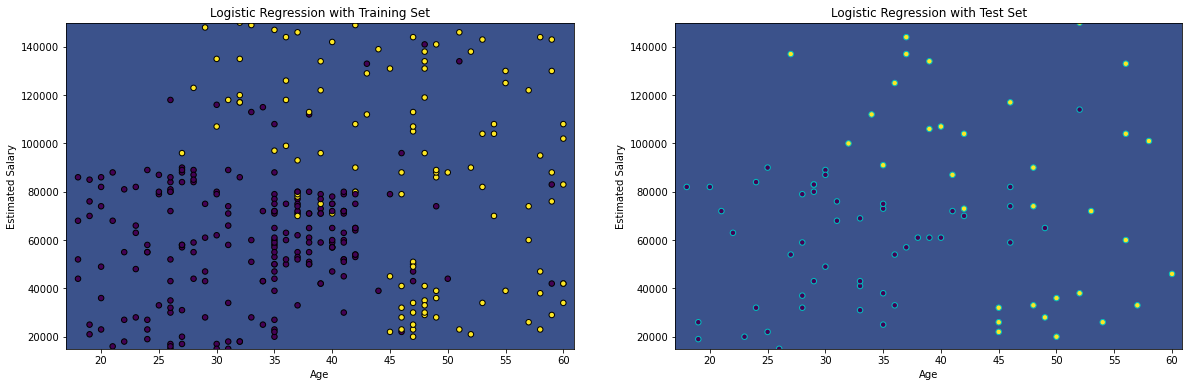

In [78]:
# result visualisation
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, z_train)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression with Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, z_test)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test, s = 30, edgecolor = 'c')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression with Test Set')
plt.show()